# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [19]:
import pandas as pd
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab



In [20]:
df = pd.read_csv('human_body_temperature.csv')

In [16]:
# There are no null values in the dataset
df.isnull().sum(axis = 0)

temperature    0
gender         0
heart_rate     0
dtype: int64

In [18]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


**Q1 Check the Normality of the Temperature distribution** 

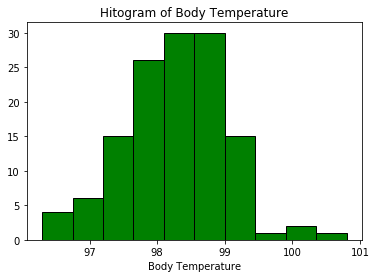

In [26]:
# histogram
plt.hist(df.temperature, color = 'green',ec='black')
plt.xlabel("Body Temperature")
plt.title("Hitogram of Body Temperature")
plt.show()

# According to the histogram we can see that the distribution is very normal. We can also further test this using qqplot.

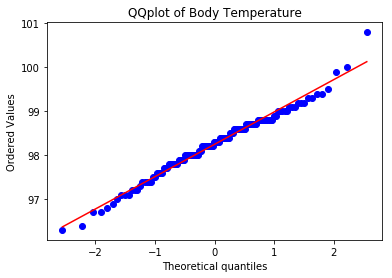

In [27]:
# use qqplot to check normality 
stats.probplot(df.temperature, dist="norm", plot=pylab)
pylab.title("QQplot of Body Temperature")
pylab.show()

*Diagram below also shows that the distribution of the Body temps is normal as the actual data plot follows very cosely to the ecdf (samples based on mu and sigma) plot.*

In [31]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x

    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

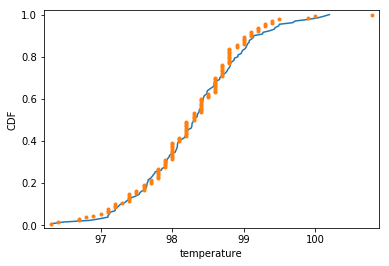

In [33]:
# Compute mean and standard deviation: mu, sigma

mu = np.mean(df['temperature'])
sigma = np.std(df['temperature'])

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=130)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(df['temperature'])

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('temperature')
_ = plt.ylabel('CDF')
plt.show()

**Q2. Is the sample size large? Are the observations independent?**

In [28]:
sample_size=df.temperature.size
sample_size

130

Sample size > 30 and sufficiently large for CLT. Samples are independent because they are taken from different people.

**Q3. Is the true population mean really 98.6 degrees F?**

**A one-sample bootstrap hypothesis test**

In [38]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [40]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [41]:
# Make an array of translated temperatures: translated_temp
translated_temp = df['temperature'].dropna() - np.mean(df['temperature']) + 98.6

# Take bootstrap replicates of translated temperatures: bs_replicates
bs_replicates = draw_bs_reps(translated_temp, np.mean, 10000)

# Compute fraction of replicates that are less than the observed population temperatures: p
p = np.sum(bs_replicates <= np.mean(df['temperature'].dropna())) / 10000

# Print the p-value
print('p = ', p)

p =  0.0


In [36]:
np.mean(df['temperature'])
# The mean of sample data is 98.25 F. Now we need to check whether the population mean is 98.6 
#or not when sample mean is lesser than that

98.24923076923078

Would you use a one-sample or two-sample test? Why? In this situation, is it appropriate to use the t or z statistic? Now try using the other test. How is the result be different? Why?

**Ho: True Population Mean is 98.6 F**

**H1: True Population Mean is not 98.6 F**

$$H_0: p_T = 98.6$$$$H_A: p_T \ne 98.6$$

Since the sample size is 130, a large sample size. *Z and t* tests will both work.

A one-sample t-test hypothesis testing: Tests the mean of a single group against a known mean

**What are T-Values and P-values?**

How big is “big enough”? Every t-value has a p-value to go with it. A p-value is the probability that the results from your sample data occurred by chance. P-values are from 0% to 100%. They are usually written as a decimal. For example, a p value of 5% is 0.05. Low p-values are good; They indicate your data did not occur by chance. For example, a p-value of .01 means there is only a 1% probability that the results from an experiment happened by chance. In most cases, a p-value of 0.05 (5%) is accepted to mean the data is valid.

Types of t-tests? There are three main types of t-test:
1. An Independent Samples t-test compares the means for two groups.
2. A Paired sample t-test compares means from the same group at different times (say, one year apart).
3. A One sample t-test tests the mean of a single group against a known mean.

In [42]:
from scipy import stats

In [44]:
#t = (sample mean - proposed mean)/ (sample std. dev / sqrt(sample size))
tstat =  (np.mean(df['temperature'].dropna()) - 98.6)/ (np.std(df['temperature'].dropna()) / np.sqrt(130))
tstat

-5.475925202078116

In [46]:
#Here we are using a 1 sample t-test since we are comparing the mean of this group of people to the known mean 98.6degF
stats.ttest_1samp(df['temperature'].dropna(), 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

According to the 1 sample t-test--> With a p-value of 10^-7 we can claim that the population mean for the Body Temperatures IS NOT 98.6. This is because our null hypothesis is that the human body temperature mean is 98.6, but this is being rejected due to the very low p-value gotten from the 1 sample t-test.

**Here we are using a 1 sample t-test since we are comparing the mean of this group of people to the known mean 98.6deg.F. A 2 sample test would be used if we were comparing male and female body temperatures i.e. 2 distinct samples.**

In [61]:
# we already have calulated the mean and satandard deviation of sample above.
#Just printing the values.
print ('The mean of sample data is: ') 
print(np.mean(df['temperature']))
print ('The standard deviation of sample data is: ') 
print(np.std(df['temperature']))

# will calculate SE(standard error). using formula SE = std / sqrt(n_data).: SE
# we have already calculated the lenght of array in valriable n_data which is 130.
SE = (np.std(df['temperature']))/np.sqrt(len(df['temperature']))
print("SE: ", SE)

# will calculate the z value now.: z
z=((np.mean(df['temperature']))-98.6)/SE
print("z-value: ",z)

The mean of sample data is: 
98.24923076923078
The standard deviation of sample data is: 
0.7303577789050377
SE:  0.06405661469519336
z-value:  -5.475925202078116


In [64]:
p = stats.norm.cdf(z)
p

2.1761575829410943e-08

Since the p-value (0.31882092904676895 ~ 0.3) is greater than the significance level (α assumed to be 0.05 for (0.95)95% confidence interval), then the null hypothesis rejected. In other words per the p-value of the zscore the human body temperature mean is NOT 98.6 deg F.
$$H_0: p_T = 98.6$$$$H_A: p_T \ne 98.6$$
This shows us that the t-statistic and z-statistic give us same results.
The 1 sample bootstrap test and the 1 sample t-test and Z test all give same results i.e. mean human body temperature is not 98.6.

**Q4 Draw a small sample of size 10 from the data and repeat both frequentist tests.**
Which one is the correct one to use?
What do you notice?
What does this tell you about the difference in application of the t and z statistic?

In [65]:
# calculate bootstrap replicates of the given dataset: bs_repl
bs_repl = draw_bs_reps(df['temperature'], np.mean, 130)

# compute the 95% confidence interval: confd_intrvl
confd_intrvl = np.percentile(df['temperature'], [2.5, 97.5])
print(confd_intrvl)

[96.7225 99.4775]


**AS per above Confidence interval calculation temperature less than 96.7225 and greater than 99.4775 degree F should be considered as "abnormal".**

**Q6 Is there a significant difference between males and females in normal temperature?**

What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.

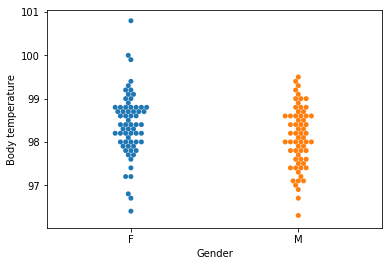

In [70]:
import seaborn as sns
# Create bee swarm plot with Seaborn's default settings
sns.swarmplot(x='gender', y='temperature', data=df)

# Label the axes
plt.xlabel('Gender')
plt.ylabel('Body temperature')

# Show the plot
plt.show()

In [76]:
groupby_gender = df.groupby('gender')

print('Means of Body Temperatures:')
for gender, value in groupby_gender['temperature']:
    if (gender ==1):
        male_t = value
        male_mean_temp = value.mean()
        print(male_t)
        print('Male Mean Temp =', male_mean_temp)
        print('Male', value.mean())
    else:
        female_t = value
        print(female_t)
        female_mean_temp = value.mean()
        print('Female Mean Temp =', female_mean_temp)
        print('Female', value.mean())

Means of Body Temperatures:
0       99.3
1       98.4
3       99.2
4       98.0
8       98.4
9       98.6
10      98.8
11      96.7
13      98.7
14      97.8
15      98.8
16      98.3
18      97.2
20      98.3
25      98.0
26      97.8
27      98.2
28      98.4
31      97.6
38      97.9
39      96.4
40      98.4
44      99.0
45      97.9
50      98.9
51      98.3
52      98.5
54      98.2
55      98.6
56      98.8
       ...  
68      98.7
70      98.1
71      97.7
76      98.0
80      98.8
83      99.2
84      98.6
86      98.6
91     100.0
92      98.8
95      96.8
96      99.9
97      98.7
98      98.8
102     98.0
103     99.4
108     98.7
110     98.8
111     98.0
112     98.2
113     99.1
116    100.8
117     97.8
119     98.4
120     97.7
121     97.9
122     99.0
123     97.2
127     98.2
129     98.7
Name: temperature, Length: 65, dtype: float64
Female Mean Temp = 98.39384615384613
Female 98.39384615384613
2      97.8
5      99.2
6      98.0
7      98.8
12     98.2
17     98.2

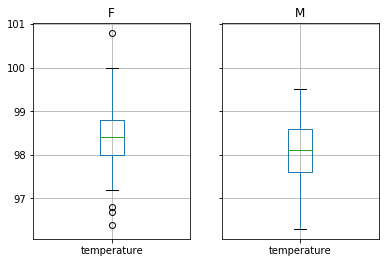

In [73]:
import matplotlib.pyplot as plt
groupby_gender.boxplot(column=['temperature'])
plt.show()

**A two-sample bootstrap hypothesis test for difference of means**

In [82]:
empirical_diff_means = np.mean(df[df['gender'] == 'F']['temperature']) - np.mean(df[df['gender'] == 'M']['temperature'])
empirical_diff_means 

0.289230769230727

In [84]:
# Compute mean of all temps: mean_temp
mean_temp = np.mean(df['temperature'])

# Generate shifted arrays
temp_male_shifted = df[df['gender'] == 'M']['temperature'] - np.mean(df[df['gender'] == 'M']['temperature']) + mean_temp
# print(temp_male_shifted)
temp_female_shifted = df[df['gender'] == 'F']['temperature'] - np.mean(df[df['gender'] == 'F']['temperature']) + mean_temp
# print(temp_female_shifted)
# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_male = draw_bs_reps(temp_male_shifted, np.mean, size=10000)
bs_replicates_female = draw_bs_reps(temp_female_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_male - bs_replicates_female
# print(bs_replicates)
# print(len(bs_replicates))
# print(bs_replicates >= empirical_diff_means)
# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)

p-value = 0.0103


A6 There a significant difference between males and females in normal temperature.
$$H_0: T_M = T_W$$$$H_A: T_M \ne T_W$$
p value is 0 (low i.e. < 0.05) indicating that the null hypothesis that states that the 2 sets are equal is refuted and there is a difference in the normal termperatures of men vs women. The testing approach I used is the 2 sample bootstrap approach to check the difference in means since that gave me enough samples i.e. 10000 to test by bootstrapping both sample sets of male and female body temperatures.
